# Esercitazione 1

## Esercizio 1
Usando le librerie matplotlib e numpy, generare e rappresentare graficamente la funzione coseno con i seguenti parametri:
- Periodo di campionamento: 0.005 s
- Numero di punti per i quali calcolare la forma d'onda: 15 s
- Iniizo temporale: -6
- Fine temporale: 9
- Frequenza fondamentale: 40 Hz

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def samples(Ts=0.005, start=-6, end=9, N=15):
    fs = 1 / Ts
    print(f"Frequenza di campionamento: {fs} Hz")
    print(f"Numero di campioni: {N}")
    t = np.linspace(start=start, stop=end, endpoint=False, num=N) * Ts # tempo normalizzato
    return t

def cos(t, f0=40):
    return np.cos(2 * np.pi * f0 * t)

In [3]:
def plot_signal(t, cos_vals):
    # Valori predefiniti
    title = "Funzione coseno"
    xlabel = "t"
    ylabel = "cos(t)"
    color = 'b'          # Colore della linea (blu)
    marker = 'o'         # Marker per i punti
    linestyle = '-'      # Stile della linea

    # Creazione del grafico
    plt.figure(figsize=(8, 5))
    plt.plot(t, cos_vals, color=color, marker=marker, linestyle=linestyle, label="Dati")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

Frequenza di campionamento: 200.0 Hz
Numero di campioni: 15


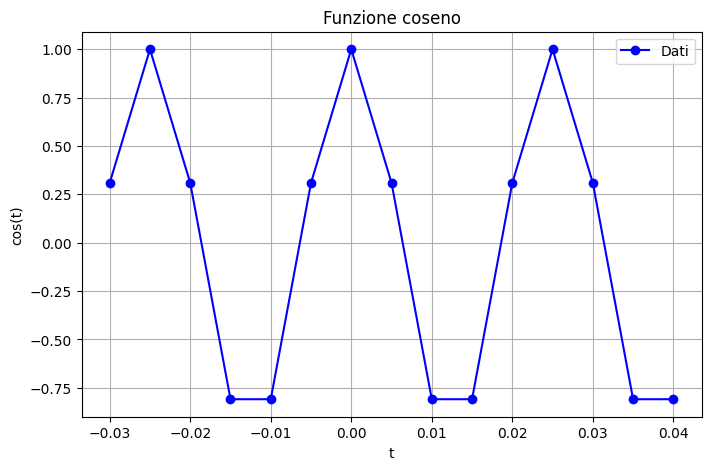

Frequenza di campionamento: 200.0 Hz
Numero di campioni: 30


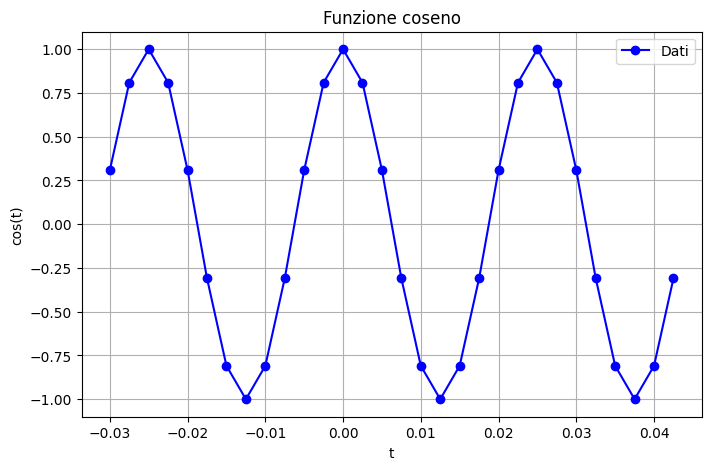

Frequenza di campionamento: 200.0 Hz
Numero di campioni: 45


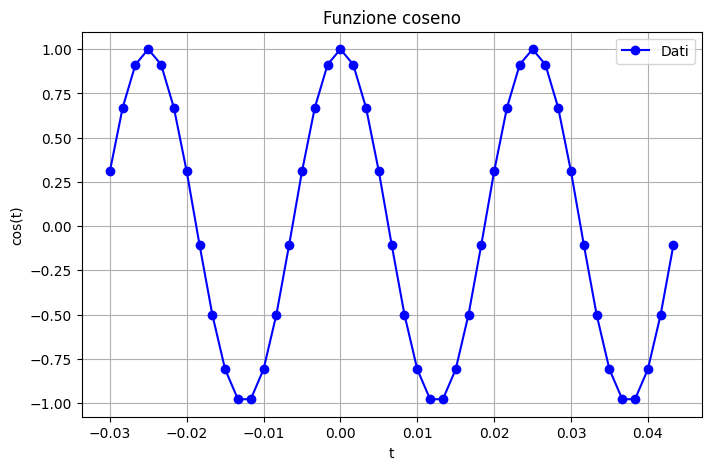

Frequenza di campionamento: 200.0 Hz
Numero di campioni: 60


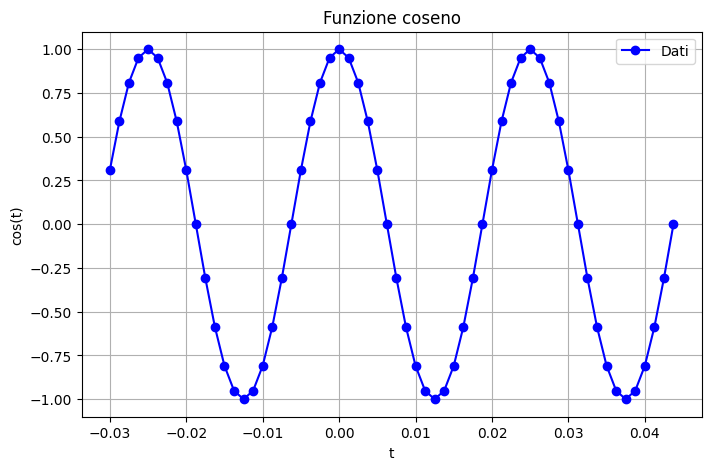

In [4]:
for n in [15, 30, 45, 60]:
    t = samples(N=n)
    cos_vals = cos(t)
    plot_signal(t, cos_vals)

## Esercizio 2
Caricare la forma d'onda "sentence.wav" usando wavfile della libreria scipy.io

In [5]:
import scipy 
import scipy.io
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# lettura
wav_name = 'sentence.wav'
samplerate, data = wavfile.read(wav_name)

In [7]:
print("Sample rate: ", samplerate)
print("Data: ", data.shape)

Sample rate:  8000
Data:  (15043,)


La funzione read di wavfile ci fornisce la traccia audio con il formato [campioni, numero canali], e il samplerate

In [8]:
print(f"numero di campioni = {data.shape[0]}")
print(f"frequenza di campionamento: {samplerate}")
length = data.shape[0] / samplerate
print(f"length (durata)= {length}s")

numero di campioni = 15043
frequenza di campionamento: 8000
length (durata)= 1.880375s


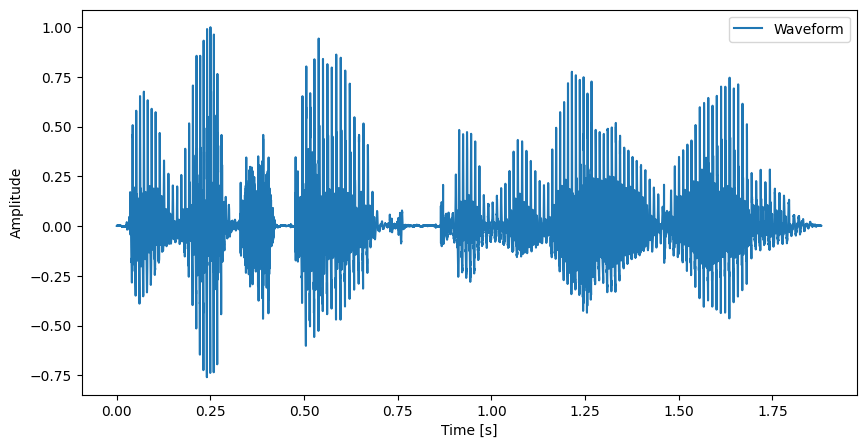

In [9]:
# procediamo a normalizzare la traccia audia per includerla tra -1 ed 1
max = np.max(np.abs(data))
data = data / max

# # plotting
time = np.linspace(0, length, data.shape[0])  # dobbiamo generare il numero di campioni discreti
# che variano da inizio a fine durata (length), con un numero di campioni pari a data.shape[0]
plt.figure(figsize=(10, 5))
plt.plot(time, data, label="Waveform")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

## Esercizio 3
Usare stavolta invece librosa

In [10]:
# caricare la forma d'onda con librosa
import scipy 
import scipy.io
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [11]:
# 1. Get the file path to an included audio example
filename = 'sentence.wav'
# 2. Load the audio as a waveform `y`, Store the sampling rate as `sr`
signal, sr = librosa.load(filename)

In [12]:
# 3. stampa dei valori
# contenuti
print(f"numero di campioni = {signal.shape[0]}")
print(f"frequenza di campionamento: {sr}")
length = signal.shape[0] / sr
print(f"length (durata)= {length}s")

numero di campioni = 41463
frequenza di campionamento: 22050
length (durata)= 1.880408163265306s


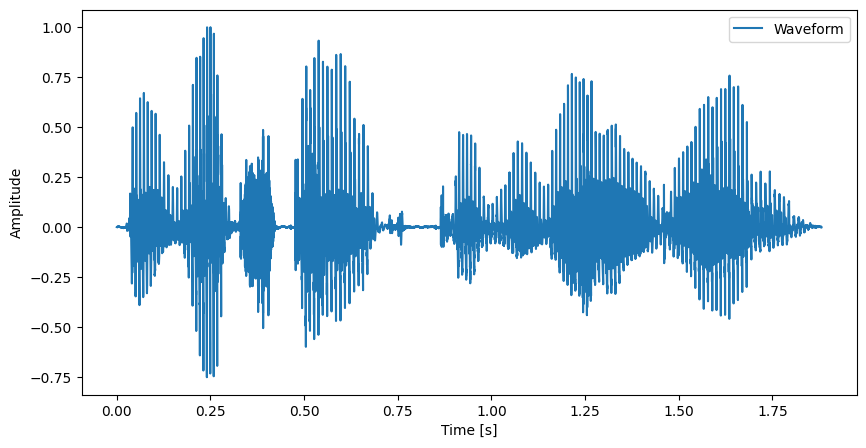

In [13]:
# procediamo a normalizzare la traccia audia per includerla tra -1 ed 1
max = np.max(np.abs(signal))
data = signal / max

# # plotting
time = np.linspace(0, length, data.shape[0])   # genera
plt.figure(figsize=(10, 5))
plt.plot(time, data, label="Waveform")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

## Esercizio 4 e 5
Sintetizzare l'onda quadra usando i seguenti parametri:
- Numero di armoniche: 4
- Coefficienti: a0=0.5, a1=-1j/pi, a2=0, a3=-1j/3pi
- f0=25Hz

Per sintetizzare l'onda quadra sappiamo che abbiamo bisogno dei coefficienti armonici prima. Questi possiamo calcolari
con la formula che viene fuori dalla serie di Fourier:
- a0 = DC (valor medio del segnale in un periodo)
- ak = 0 (se k è pari), ak = -1j / (k * np.pi) per k dispari

Dopodiché: x(t) = a0 + 2 Re{ sum (k=1,N) a_k e^{j2pikf0t} }

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def compute_coeffs(N=4):
    '''
    permette di calcolare i coefficienti a partire dai coefficienti della serie armonica di Fourier
    '''
    coeffs = {}
    coeffs[0] = 0.5
    for i in range(1, N):
        if i % 2 == 0:
            coeffs[i] = 0.0
        else:
            coeffs[i] = -1j / (i * np.pi)
    return coeffs

In [16]:
def synthesize_square_wave(t, F0, coeffs):
    """
    Sintetizza un'onda quadra con le armoniche date.

    Parametri:
    - t: array di tempi
    - F0: frequenza fondamentale
    - coeffs: dizionario {indice: coefficiente complesso}
    
    Ritorna:
    - Segnale ricostruito

    x(t) = a0 + 2 Re{ sum (k=1,N) a_k e^{j2pikf0t} }
    Quindi prima genero un certo numero di valori temporali, più fitti sono più il valore
    sembra quasi continuo.
    a0 è la componente in continua del segnale periodico
    """
    wave = np.full_like(t, np.real(coeffs[0]), dtype=np.float64)  # Componente DC (a0)
    # print(wave)
    cum_sum = 0
    for n, a_n in coeffs.items():
        # sommo ogni componente di ogni armonica, scorrendo i coefficienti
        # la prima armonica è già stata sommata
        # dopodiché moltiplico per t che in realtà sarebbe un valore discreto
        if n == 0:
            continue
        cum_sum += np.real(a_n * np.exp(1j * 2 * np.pi * n * F0 * t))
    wave = wave + 2 * cum_sum # prendendo solo la parte reale, devo moltiplicare per due questa
    return wave

In [17]:
def plot_square_wave(t, y, F0):
    """
    Plotta l'onda quadra sintetizzata e l'onda quadra ideale.

    Parametri:
    - t: array dei tempi
    - y: segnale sintetizzato con la serie di Fourier
    - F0: frequenza fondamentale dell'onda quadra
    """
    # Generazione dell'onda quadra ideale tra 0 e 1
    square_wave = 0.5 * (np.sign(np.sin(2 * np.pi * F0 * t)) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(t, y, label="Onda quadra sintetizzata", color='b', linestyle='-')
    plt.plot(t, square_wave, label="Onda quadra ideale", color='r', linestyle='--', alpha=0.7)
    
    plt.xlabel("Tempo (s)")
    plt.ylabel("Ampiezza")
    plt.title("Sintesi di un'onda quadra con serie di Fourier")
    plt.grid(True)
    plt.legend()
    plt.show()

In [18]:
def synthesize(F0=25, N=4):
    '''
    f0: frequenza fondamentale
    N: armoniche
    '''
    # Parametri
    T = 1 / F0  # Periodo fondamentale
    t = np.linspace(0, 2*T, 1000)  # 2 periodi con 500 campioni

    # calcolo i coefficieni
    coeffs = compute_coeffs(N=N)
    # Generazione dell'onda quadra sintetizzata
    y = synthesize_square_wave(t, F0, coeffs)

    plot_square_wave(t,y,F0)


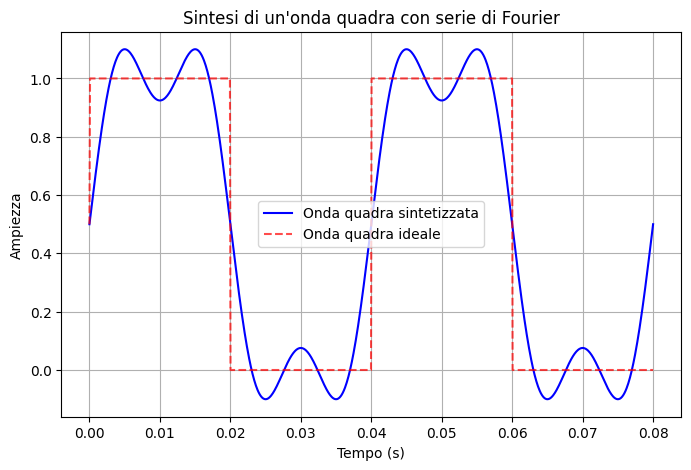

In [19]:
synthesize(N=4)

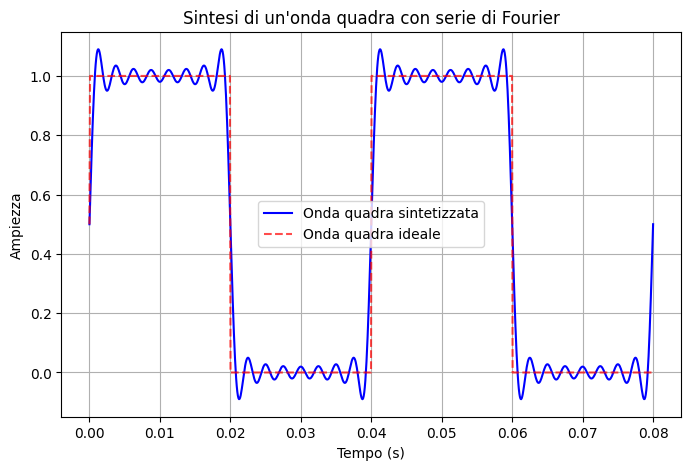

In [20]:
synthesize(N=16)

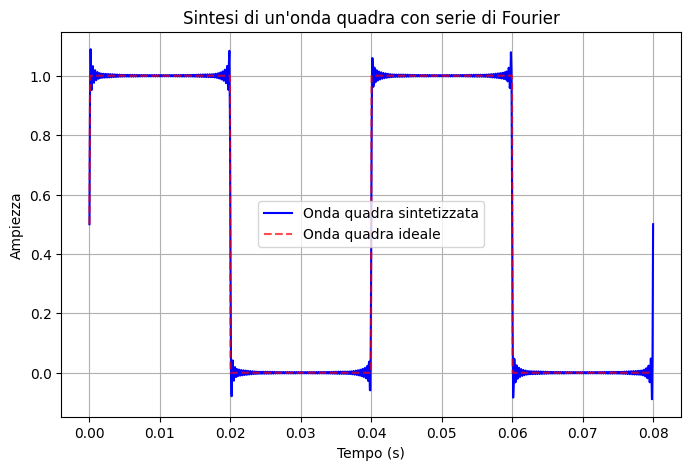

In [21]:
synthesize(N=128)

## Esercizio 6
Sintetizzare la C-major scale e mostrarne lo spettogramma usando il metodo specshow della libreria librosa.display. I parametri sono:
- fs=4000 (provare anche con 44000)
- durata di ogni nota = 0.2 s
- note nella scala:  ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5' ]
- frequenze:  [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]

In [22]:
# notes = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5' ]
frequencies = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]
# frequencies = [261.63, 293.66, 329.63, 349.23, 392.00, 329.63, 349.23, 293.66]
# mapping = {notes[i]:frequencies[i] for i in range(len(notes))}
# print(mapping)

In [23]:
# T = 0.2
T = 0.4
# fs = 4000
fs = 44000

Per prima cosa andiamo a discretizzare il tempo:

In [24]:
N = int(T * fs)
t = np.linspace(start=0, stop=T, endpoint=False, num=N)

Quindi creo la scala. La scala la ottengo andando a usare il segnale singolare creato da ogni frequenza, quindi dobbiamo andare a creare tanti segnali di durata ciascuno T secondi. Essendo una scala, li vado a concatenare tutti

In [25]:
scale = np.concatenate([np.sin(2 * np.pi * f * t) for f in frequencies])  # Creazione della scala
print(scale.shape)

(140800,)


Se volessi vedere nel dominio del tempo:

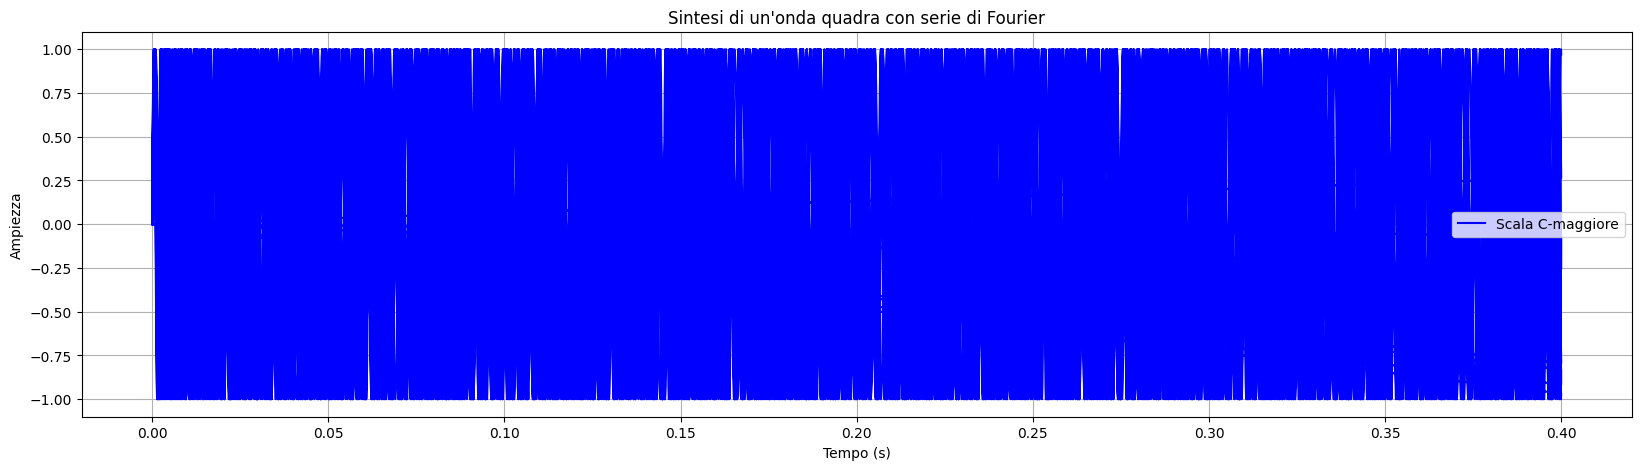

In [26]:
def plot_scala(t, scala, n_notes=8):
    """
    Plotta l'onda quadra sintetizzata e l'onda quadra ideale.

    Parametri:
    - t: array dei tempi
    - y: segnale sintetizzato con la serie di Fourier
    - F0: frequenza fondamentale dell'onda quadra
    """
    t_c = np.concatenate([t for _ in range(n_notes)])
    plt.figure(figsize=(20, 5))
    plt.plot(t_c, scala, label="Scala C-maggiore", color='b', linestyle='-')
    plt.xlabel("Tempo (s)")
    plt.ylabel("Ampiezza")
    plt.title("Sintesi di un'onda quadra con serie di Fourier")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_scala(t, scale)

Adesso usiamo lo spettogramma.
- per prima cosa dobbiamo determinare il scale usando la stft, che ci permette di ottenere il segnale nel dominio della frequenza, calcolando quindi la Short Time Fourier Transform. Dopodiché specifichiamo anche il numero di campioni da campionare (n_fft) e di quanto deve essere il frame di campionamento in frequenza (hop_size)

Quando si calcola lo spettogramma di un segnale audio con la **Short-Time Fourier Transform (SFTF)** il segnale viene diviso in finestre temporali più piccole (frame) e su ciascun frame viene applicata una trasformata di Fourier.
- frame size: è la dimensione del frame, indica la lunghezza della finestra FFT in campioni. Determina la risoluzione della frequenza. Valori più grnadi indicano maggiore precisione in frequenza, migliore valori più piccoli indicano migliore risoluzione temporale. 
- hop size: definisce di quanti campioni si sposta la finestra tra due trasformate successive. Un valore più piccolo sovrappone maggiormente le finestre, aumentando la risoluzione temporale. Un valore più grande invece riduce l'overlap e accellera il calcolo, con minor risoluzione temporale

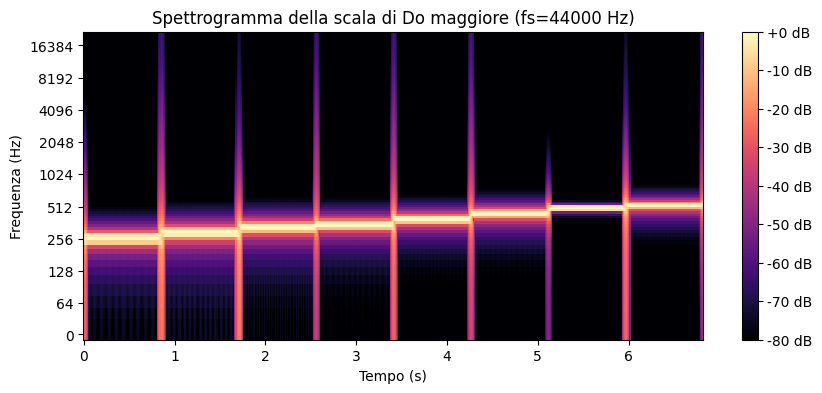

In [30]:
frame_size = 2048 # dimensione del frame, fin dove rappresentare le frequenze
hop_size = 240 # passo o step di hop
# frame_size = 2048 # dimensione del frame, fin dove rappresentare le frequenze
# hop_size = 512 # passo o step di hop
# Spettrogramma
D = librosa.amplitude_to_db(np.abs(librosa.stft(scale, n_fft=frame_size, hop_length=hop_size)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spettrogramma della scala di Do maggiore (fs={fs} Hz)')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequenza (Hz)')
plt.show()

Possiamo infine salvare l'audio in una traccia

In [31]:
# Salvataggio della traccia audio
import scipy.io.wavfile as wav 
audio_filename = f"C_major_scale_{fs}Hz.wav"
# Normalizzazione per evitare clipping
# scale = (scale * 32767).astype(np.int64)
y_audio = np.abs(scale)**2 # parte reale
y_audio = y_audio.astype(np.float64)
wav.write(audio_filename, fs, y_audio)
print(f"Traccia audio salvata come {audio_filename}")

Traccia audio salvata come C_major_scale_44000Hz.wav


## Esercizio 7
Sintetizzare il segnale acutstico chirp, usando la libreria scipy.signal. Salvare la forma d'onda e riprodurla per l'ascolto. I parametri sono:
- Durata=3 secondi
- F0=20Hz
- F1=200Hz
- Fs=4000Hz

In [32]:
T = 3
fs = 4000
N = T * fs
t = np.arange(N) * T / fs # timestamps
print(f"Numero di campioni: {N}")
print(f"Tempi: {t.shape}")

Numero di campioni: 12000
Tempi: (12000,)


In [33]:
import numpy as np
from matplotlib.pyplot import tight_layout
from scipy.signal import chirp, square, ShortTimeFFT
from scipy.signal.windows import gaussian
import matplotlib.pyplot as plt

In [34]:
x_lin = chirp(t, f0=20, f1=200, t1=T, method='linear')

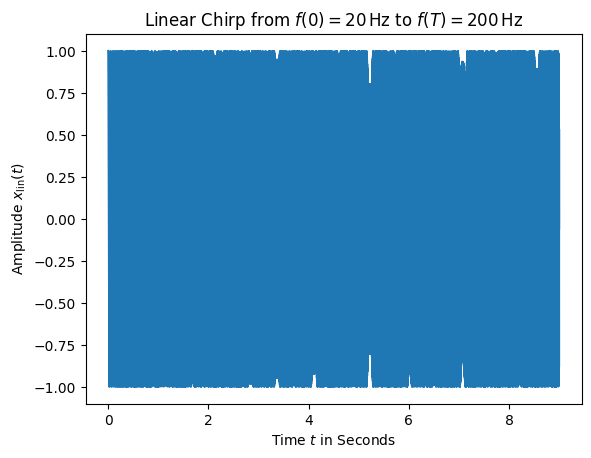

In [35]:
fg0, ax0 = plt.subplots()
ax0.set_title(r"Linear Chirp from $f(0)=20\,$Hz to $f(T)=200\,$Hz")
ax0.set(xlabel="Time $t$ in Seconds", ylabel=r"Amplitude $x_\text{lin}(t)$")
ax0.plot(t, x_lin)
plt.show()


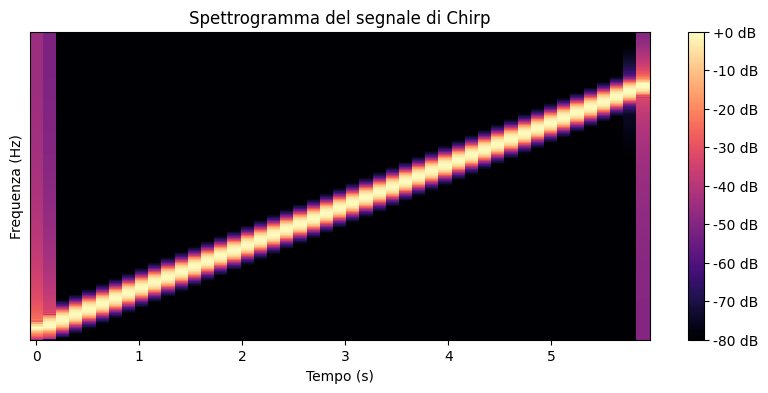

In [36]:
frame_size = 1024 # dimensione del frame, fin dove rappresentare le frequenze
hop_size = 256 # passo o step di hop
# Spettrogramma
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_lin, n_fft=frame_size, hop_length=hop_size)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=fs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spettrogramma del segnale di Chirp')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequenza (Hz)')
plt.show()

Come ci aspettavamo, lo spettogramma del segnale chirp che ne viene fuori è un segnale lineare

In [37]:
# Salvataggio della traccia audio
import scipy.io.wavfile as wav 
audio_filename = f"chirp_{fs}Hz.wav"
y_audio = np.abs(x_lin)**2 # parte reale
y_audio = y_audio.astype(np.float64)
wav.write(audio_filename, fs, y_audio)
print(f"Traccia audio salvata come {audio_filename}")

Traccia audio salvata come chirp_4000Hz.wav


## Esercizio 8
Usando la libreria numpy, calcolare la DFT della sinusoide con i seguenti parametri:
- fs = 2000 Hz
- F0 = 10
- N = 1024

In [38]:
def sin_wave(N=1024, f0=10, fs=2000):
    # N = T * fs
    T = fs / N
    Ts = 1 / fs
    print("Periodo: ", T)
    t = np.linspace(start=0, stop=T, endpoint=False, num=N) # normalizzare
    return t, np.sin(2 * np.pi * f0 * t)

t, sin_vals = sin_wave()
# plot_signal(t, sin_vals)


Periodo:  1.953125


Quindi procedo con il calcolo della DFT

In [39]:
# Calcolare la DFT
def calculate_dft(signal):
    return np.fft.fft(signal)

# Plot del segnale e della DFT
def plot_dft(t, sin_vals):
    # Calcolare la DFT
    dft_vals = calculate_dft(sin_vals)
    freqs = np.fft.fftfreq(len(t), t[1] - t[0])  # Frequenze corrispondenti alla DFT

    # Plot del segnale nel dominio del tempo
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, sin_vals, label="Segnale Sinusoidale")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Ampiezza")
    plt.title("Segnale Sinusoidale")
    plt.grid(True)
    plt.legend()

    # Plot della DFT nel dominio delle frequenze
    plt.subplot(2, 1, 2)
    plt.plot(freqs[:len(freqs)//2], np.abs(dft_vals)[:len(dft_vals)//2], label="Spettro di Frequenza")
    plt.xlabel("Frequenza [Hz]")
    plt.ylabel("Ampiezza")
    plt.title("Spettro di Frequenza della DFT")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

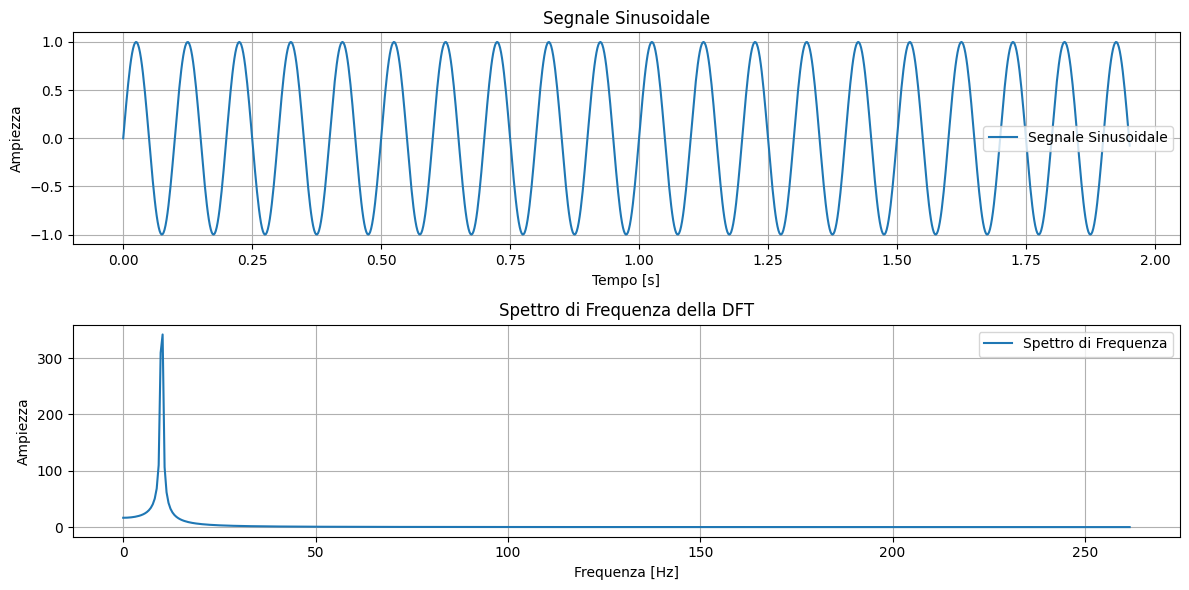

In [40]:
plot_dft(t, sin_vals)

Come notiamo dalla forma d'onda, l'unica componente è l'armonica F0 principale, ovvero la frequenza fondamentale

## Esercizio 9
Calcolare la DFT sui 4 punti della sequenza x[n]={1,1,0,0}, k=0,1,2,3

In [41]:
def compute_matrix(N, signal):
    W_n = np.exp(-1j*2*np.pi / N)
    dft_matrix = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            dft_matrix[k] += signal[n] * (W_n ** (k*n))
    return dft_matrix

x = [1,1,0,0]
X = compute_matrix(N=4, signal=x)
print(X)

[2.+0.0000000e+00j 1.-1.0000000e+00j 0.-1.2246468e-16j 1.+1.0000000e+00j]


## Esercizio 10
Generare la 50% duty cycle square wave usando Python e la libraria scipy. Usando i seguenti parametri:
- T0 = 1 s
- Ts = 0.001
- start = 0
- end = 2
- numero massimo di armoniche = 400

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parametri
T0 = 1  # Periodo dell'onda quadra (secondi)
Ts = 0.001  # Tempo di campionamento (secondi)
start_time = 0  # Tempo di inizio (secondi)
end_time = 2  # Tempo di fine (secondi)
max_harmonics = 50  # Numero massimo di armoniche
# max_harmonics = [50, 100, 150, 200, 250, 300, 350, 400] 
                 
# Creazione del vettore temporale
t = np.arange(start_time, end_time, Ts) # crea un vettore che inizia da start, finesce in end 

# Generazione della square wave con una frequenza fondamentale di 1 Hz
fundamental_frequency = 1 / T0  # Frequenza fondamentale in Hz
square_wave = signal.square(2 * np.pi * fundamental_frequency * t)

In [43]:
# Aggiunta delle armoniche per migliorare l'approssimazione
# La forma d'onda viene approssimata dalla somma delle armoniche dispari
harmonics_wave = np.zeros_like(t)
for n in range(1, max_harmonics + 1, 2):  # Solo armoniche dispari
    harmonics_wave += (1 / n) * np.sin(2 * np.pi * n * fundamental_frequency * t)

# Somma la forma d'onda fondamentale con le armoniche
approximated_wave = 4 / np.pi * harmonics_wave

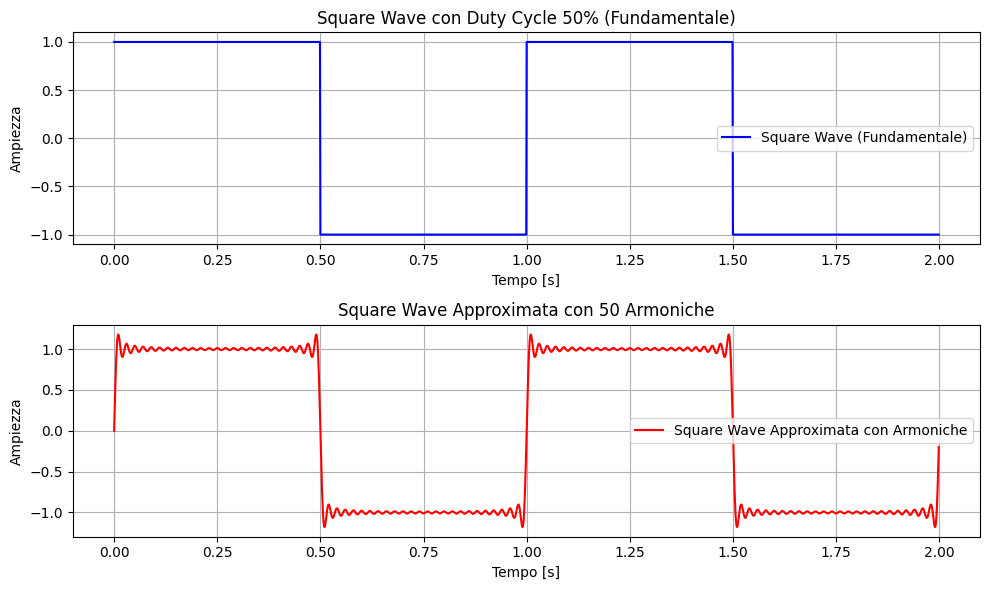

In [44]:
# Plot della square wave originale e dell'onda approssimata
plt.figure(figsize=(10, 6))

# Plot della square wave
plt.subplot(2, 1, 1)
plt.plot(t, square_wave, label="Square Wave (Fundamentale)", color='blue')
plt.title("Square Wave con Duty Cycle 50% (Fundamentale)")
plt.xlabel("Tempo [s]")
plt.ylabel("Ampiezza")
plt.grid(True)
plt.legend()

# Plot dell'onda approssimata con armoniche
plt.subplot(2, 1, 2)
plt.plot(t, approximated_wave, label="Square Wave Approximata con Armoniche", color='red')
plt.title(f"Square Wave Approximata con {max_harmonics} Armoniche")
plt.xlabel("Tempo [s]")
plt.ylabel("Ampiezza")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


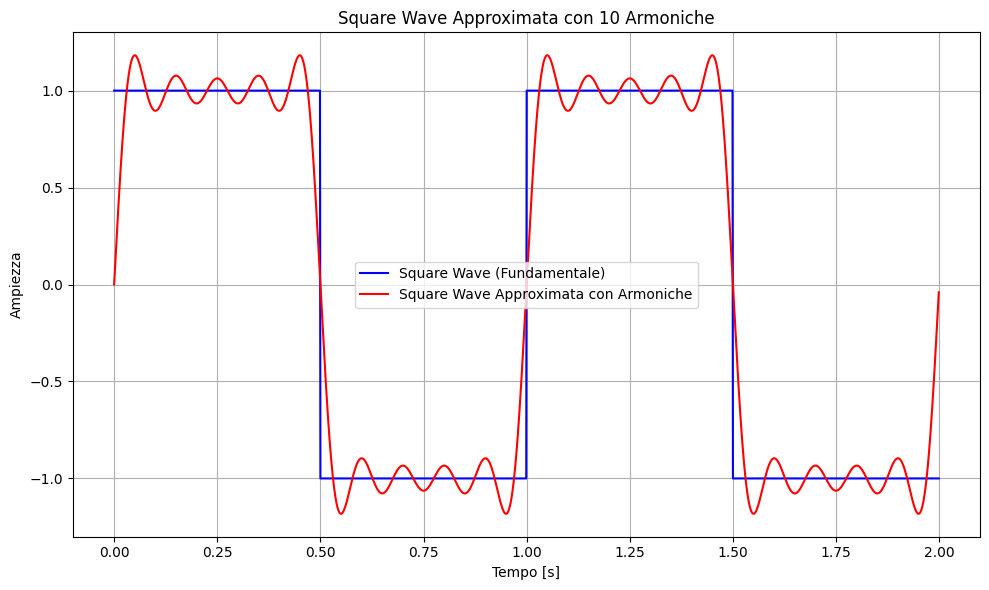

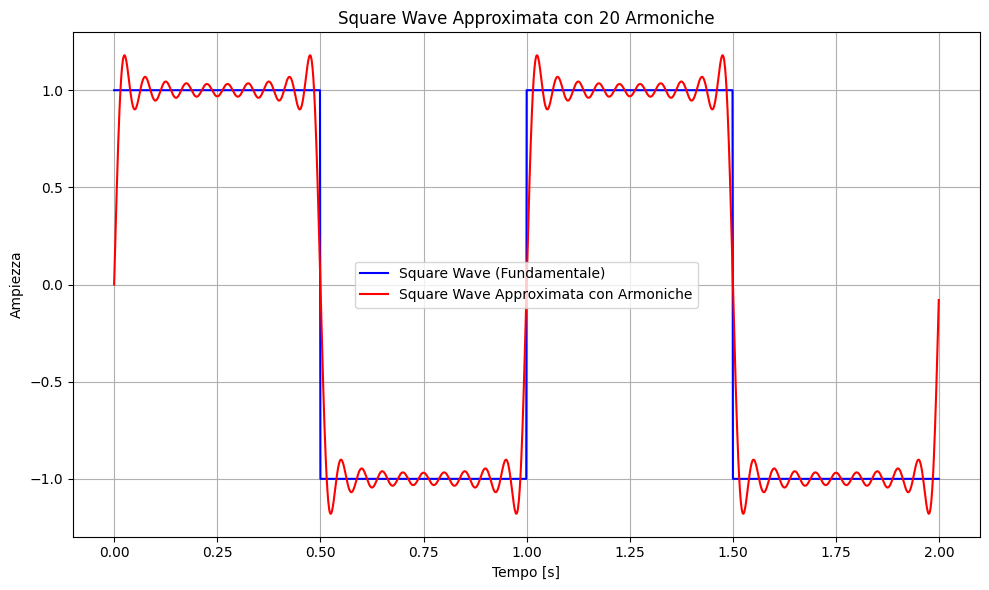

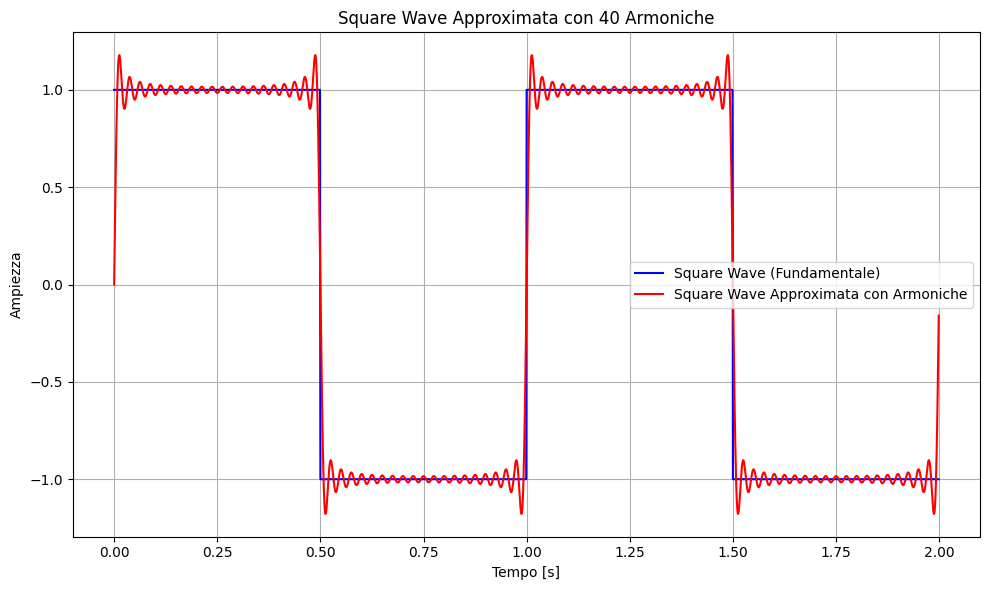

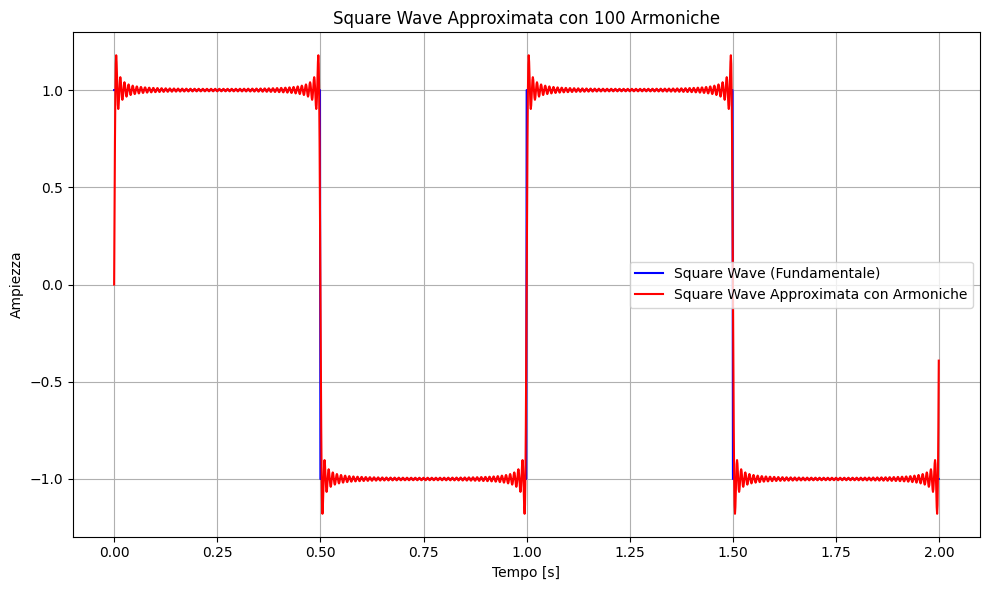

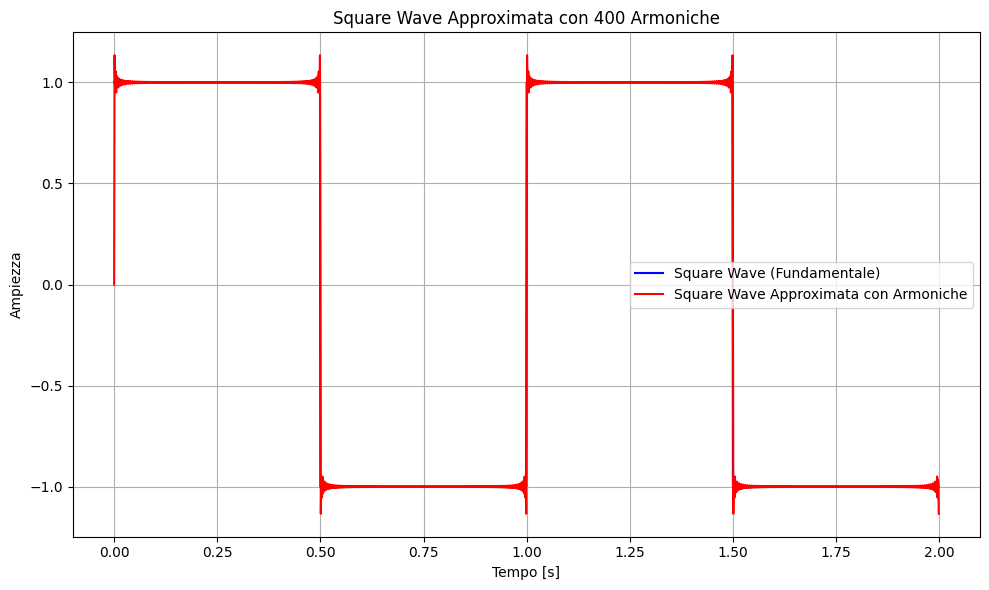

In [45]:
# Parametri
T0 = 1  # Periodo dell'onda quadra (secondi)
Ts = 0.001  # Tempo di campionamento (secondi)
start_time = 0  # Tempo di inizio (secondi)
end_time = 2  # Tempo di fine (secondi)
# max_harmonics = 50  # Numero massimo di armoniche
max_harmonics = [10, 20, 40, 100, 400] 
                 
# Creazione del vettore temporale
t = np.arange(start_time, end_time, Ts) # crea un vettore che inizia da start, finesce in end 

# Generazione della square wave con una frequenza fondamentale di 1 Hz
fundamental_frequency = 1 / T0  # Frequenza fondamentale in Hz
square_wave = signal.square(2 * np.pi * fundamental_frequency * t)

for max_h in max_harmonics:
    # Aggiunta delle armoniche per migliorare l'approssimazione
    # La forma d'onda viene approssimata dalla somma delle armoniche dispari
    harmonics_wave = np.zeros_like(t)
    for n in range(1, max_h + 1, 2):  # Solo armoniche dispari
        harmonics_wave += (1 / n) * np.sin(2 * np.pi * n * fundamental_frequency * t)
    # Somma la forma d'onda fondamentale con le armoniche
    approximated_wave = 4 / np.pi * harmonics_wave
    # Plot della square wave originale e dell'onda approssimata
    plt.figure(figsize=(10, 6))

    # Plot della square wave
    plt.plot(t, square_wave, label="Square Wave (Fundamentale)", color='blue')
    plt.plot(t, approximated_wave, label="Square Wave Approximata con Armoniche", color='red')
    plt.title(f"Square Wave Approximata con {max_h} Armoniche")
    plt.xlabel("Tempo [s]")
    plt.ylabel("Ampiezza")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()



In [46]:
def compute_coeffs(N=4):
    coeffs = {}
    coeffs[0] = 0.5
    for i in range(1, N):
        if i % 2 == 0:
            coeffs[i] = 0.0
        else:
            coeffs[i] = -1j / (i * np.pi)
    return coeffs

def synthesize_square_wave(t, F0, coeffs):
    """
    Sintetizza un'onda quadra con le armoniche date.

    Parametri:
    - t: array di tempi
    - F0: frequenza fondamentale
    - coeffs: dizionario {indice: coefficiente complesso}
    
    Ritorna:
    - Segnale ricostruito

    x(t) = a0 + 2 Re{ sum (k=1,N) a_k e^{j2pikf0t} }
    Quindi prima genero un certo numero di valori temporali, più fitti sono più il valore
    sembra quasi continuo.
    a0 è la componente in continua del segnale periodico
    """
    wave = np.full_like(t, np.real(coeffs[0]), dtype=np.float64)  # Componente DC (a0)
    # print(wave)
    cum_sum = 0
    for n, a_n in coeffs.items():
        # sommo ogni componente di ogni armonica, scorrendo i coefficienti
        # la prima armonica è già stata sommata
        # dopodiché moltiplico per t che in realtà sarebbe un valore discreto
        if n == 0:
            continue
        cum_sum += np.real(a_n * np.exp(1j * 2 * np.pi * n * F0 * t))
    wave = wave + 2 * cum_sum # prendendo solo la parte reale, devo moltiplicare per due questa
    return wave

def plot_square_wave(t, y, F0):
    """
    Plotta l'onda quadra sintetizzata e l'onda quadra ideale.

    Parametri:
    - t: array dei tempi
    - y: segnale sintetizzato con la serie di Fourier
    - F0: frequenza fondamentale dell'onda quadra
    """
    # Generazione dell'onda quadra ideale tra 0 e 1
    square_wave = 0.5 * (np.sign(np.sin(2 * np.pi * F0 * t)) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(t, y, label="Onda quadra sintetizzata", color='b', linestyle='-')
    plt.plot(t, square_wave, label="Onda quadra ideale", color='r', linestyle='--', alpha=0.7)
    
    plt.xlabel("Tempo (s)")
    plt.ylabel("Ampiezza")
    plt.title("Sintesi di un'onda quadra con serie di Fourier")
    plt.grid(True)
    plt.legend()
    plt.show()

def synthesize(F0=1, N=4, Ts=0.001):
    '''
    f0: frequenza fondamentale
    N: armoniche
    '''
    # Parametri
    T = 1 / F0  # Periodo fondamentale
    t = np.arange(start=0, stop=2+Ts, step=Ts)
    # t = np.linspace(start=0, stop=2, num=Fs)  # 2 periodi con 500 campioni

    # calcolo i coefficieni
    coeffs = compute_coeffs(N=N)
    # Generazione dell'onda quadra sintetizzata
    y = synthesize_square_wave(t, F0, coeffs)

    plot_square_wave(t,y,F0)
    return y


In [55]:
import sounddevice as sd

Playing sound...


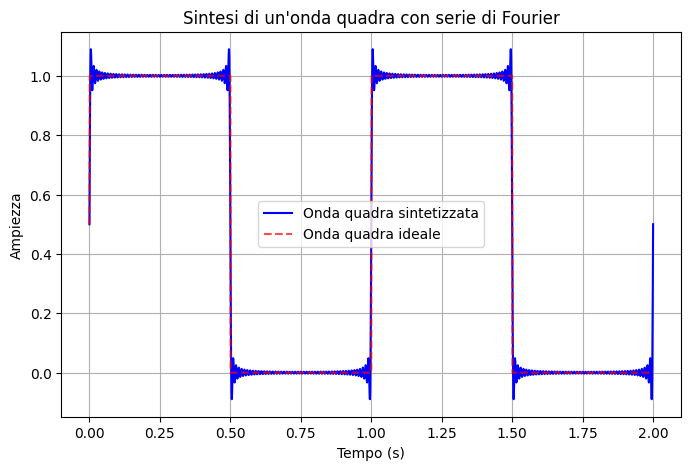

Playback finished.


In [59]:
max_harmonics = [100]
Ts = 0.001
fs = 1 / Ts
for n in max_harmonics:
    print("Playing sound...")
    y = synthesize(F0=1, N=n)
    sd.play(y, samplerate=fs)
    sd.wait()
    print("Playback finished.")
    

Come possiamo notare, abbiamo ricostruito il segnale a partire dalle armoniche fondamentali.